# E SE VOCÊ ESTIVESSE NO TITANIC?


<img src='titanic.jpg' style="float:left" width='50%'/>

"O naufrágio do RMS Titanic é o mais famoso naufrágio da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou depois de colidir com um iceberg. Essa tragédia levou a comunidade internacional a melhores normas de segurança para os navios.

Uma das razões pelas quais o naufrágio causou tamanha perda de vidas foi que não havia botes salva-vidas suficientes para os passageiros e a tripulação. Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, alguns grupos de pessoas tinham maior probabilidade de sobreviver do que outros, como mulheres, crianças e a classe alta ".

### Objetivos da tarefa

"Nesse desafio, vamos criar um modelo em machine learning capaz de predizer se determinado passageiro provavelmente sobreviveria ou não ao desastre do titanic"


#### Tipo da tarefa

Classificação Binária


#### Ambiente de dados de treinamento

- sex (sexo do passageiro | male/female) Qualitativo nominal
- age (idade do passageiro) Quantitavo contínuo
- social_class (classe social do passageiro) Qualitativo ordinal

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

##import warnings
##warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [75]:
df = pd.read_csv('titanic.csv')

In [53]:
df.head()

,id,sex,age,social_class,survived
0,0,1,22.0,3.0,no
1,1,0,38.0,1.0,yes
2,2,0,26.0,3.0,yes
3,3,0,35.0,1.0,yes
4,4,1,35.0,3.0,no


In [54]:
df = df.drop('id', axis=1)

In [55]:
df.describe()

,sex,age,social_class
count,891.000000,891.000000,891.000000
mean,0.647587,29.699118,2.308642
std,0.477990,13.002015,0.836071
min,0.000000,0.420000,1.000000
25%,0.000000,22.000000,2.000000
50%,1.000000,29.699118,3.000000
75%,1.000000,35.000000,3.000000
max,1.000000,80.000000,3.000000


In [56]:
df['survived'].value_counts()

no     549
yes    342
Name: survived, dtype: int64

In [51]:
df['social_class'].unique()

array([3., 1., 2.])

In [58]:
df.loc[((df['sex']==1) & (df['survived']=='yes')), 'social_class'].value_counts()

3.0    47
1.0    45
2.0    17
Name: social_class, dtype: int64

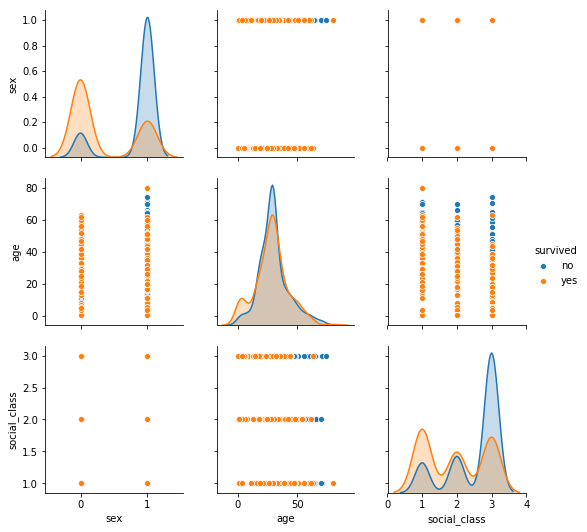

In [60]:
sb.pairplot(df, hue='survived')

In [61]:
X = np.array(df.drop('survived', axis=1))
X

array([[ 1.        , 22.        ,  3.        ],
       [ 0.        , 38.        ,  1.        ],
       [ 0.        , 26.        ,  3.        ],
       ...,
       [ 0.        , 29.69911765,  3.        ],
       [ 1.        , 26.        ,  1.        ],
       [ 1.        , 32.        ,  3.        ]])

In [62]:
y = np.array(df.survived)

In [63]:
y

array(['no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes',
       'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes',
       'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no',
       'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes',
       'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no',
       'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes',
       'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes',

In [64]:
from sklearn import tree

In [65]:
clf = tree.DecisionTreeClassifier()

In [66]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [67]:
## sex, age, social_class

clf.predict([[1, 42, 2],
             [0, 26, 2],
             [1, 15, 2],
             [1,  6, 2],
            ])

array(['no', 'no', 'no', 'yes'], dtype=object)

In [68]:
clf.predict_proba([[1, 45, 2],
                   [0, 26, 2],
                   [1, 15, 2],
                   [1,  6, 2],
                  ])



array([[0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ]])

## Salvando o modelo

In [69]:
import pickle

In [70]:
filename = 'titanic.plk'
pickle.dump(clf, open(filename, 'wb'))

## Carregando o modelo

In [71]:
clf_loaded = pickle.load(open(filename, 'rb'))

In [72]:
clf_loaded.predict([[1, 42, 2],
                    [0, 26, 2],
                    [1, 15, 2],
                    [1,  6, 2],
                  ])

array(['no', 'no', 'no', 'yes'], dtype=object)